In [57]:
print("Scenario 1")
print("Gowtham S - 24BAD028")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

Scenario 1
Gowtham S - 24BAD028


In [58]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [59]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [61]:

df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [62]:
le = LabelEncoder()

categorical_cols = [
    'gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course'
]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [63]:
df['final_exam_score'] = (
    df['math score'] + df['reading score'] + df['writing score']
) / 3
df.fillna(df.mean(),inplace=True)

In [64]:
X = df[
    [
        'math score',
        'reading score',
        'writing score',
        'gender',
        'race/ethnicity',
        'parental level of education',
        'lunch',
        'test preparation course'
    ]
]


y = df['final_exam_score']

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [66]:

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MSE : 5.2348809670466345e-28
RMSE: 2.2879862252746704e-14
R²  : 1.0


In [67]:

coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coeff_df

,Feature,Coefficient
0,math score,5.051832e+00
1,reading score,4.864297e+00
2,writing score,5.062686e+00
3,gender,2.004683e-15
4,race/ethnicity,3.693967e-15
5,parental level of education,2.420511e-15
6,lunch,5.598190e-15
7,test preparation course,-2.287865e-16


In [68]:

coeff_df.sort_values(by='Coefficient', key=abs, ascending=False)

,Feature,Coefficient
2,writing score,5.062686e+00
0,math score,5.051832e+00
1,reading score,4.864297e+00
6,lunch,5.598190e-15
4,race/ethnicity,3.693967e-15
5,parental level of education,2.420511e-15
3,gender,2.004683e-15
7,test preparation course,-2.287865e-16


In [69]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

print("Ridge R²:", r2_score(y_test, ridge_pred))

Ridge R²: 0.999999651718534


In [70]:
lasso = Lasso(alpha=0.05)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

print("Lasso R²:", r2_score(y_test, lasso_pred))

Lasso R²: 0.9999855679914085


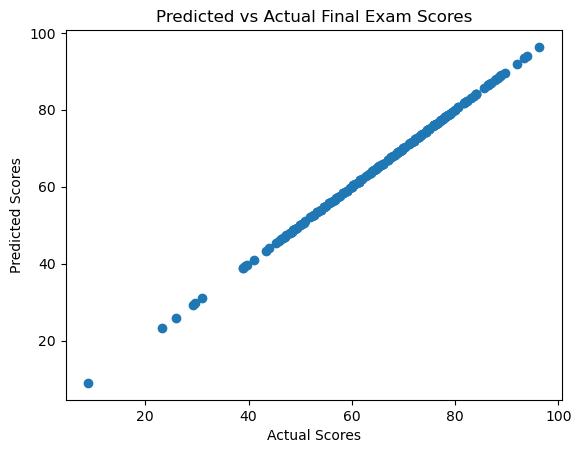

In [71]:

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Predicted vs Actual Final Exam Scores")
plt.show()

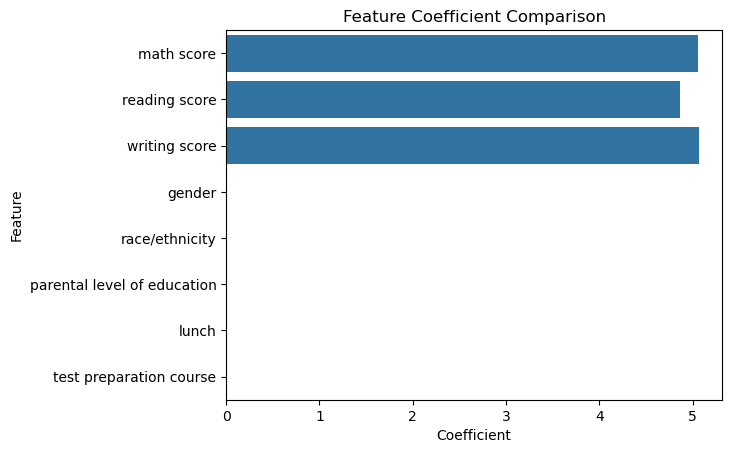

In [72]:

plt.figure()
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title("Feature Coefficient Comparison")
plt.show()

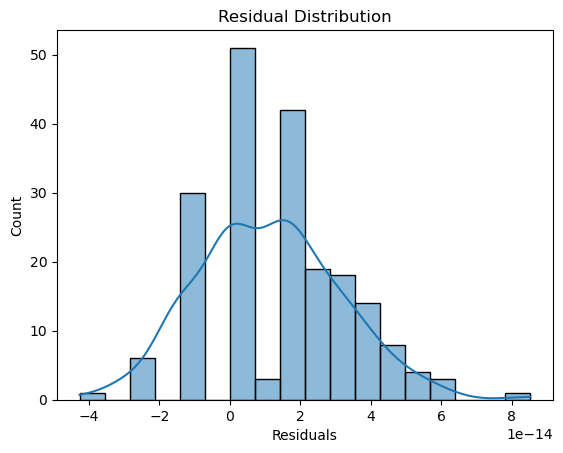

In [73]:

residuals = y_test - y_pred

plt.figure()
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.show()

In [83]:
print("Scenario 2")
print("Gowtham S - 24BAD028")
from sklearn.preprocessing import PolynomialFeatures

Scenario 2
Gowtham S - 24BAD028


In [84]:
df = pd.read_csv("auto-mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [85]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
X = df[['horsepower']]
y = df['mpg']
X.fillna(X.mean(), inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_12736\2678967973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


In [86]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [89]:
def polynomial_model(degree):
    poly = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    return y_train_pred, y_test_pred

In [90]:
results = {}

for d in [2, 3, 4]:
    y_train_pred, y_test_pred = polynomial_model(d)
    results[d] = (y_train_pred, y_test_pred)
performance = []

for degree, (y_train_pred, y_test_pred) in results.items():
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_test_pred)
    
    performance.append([degree, mse, rmse, r2])

perf_df = pd.DataFrame(
    performance,
    columns=['Degree', 'MSE', 'RMSE', 'R2 Score']
)

perf_df

,Degree,MSE,RMSE,R2 Score
0,2,13.760855,3.709563,0.744062
1,3,13.813374,3.716635,0.743086
2,4,14.118024,3.757396,0.737419


In [91]:
poly = PolynomialFeatures(degree=4)

X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_poly, y_train)

ridge_pred = ridge.predict(X_test_poly)

print("Ridge R²:", r2_score(y_test, ridge_pred))

Ridge R²: 0.7393719439438633


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


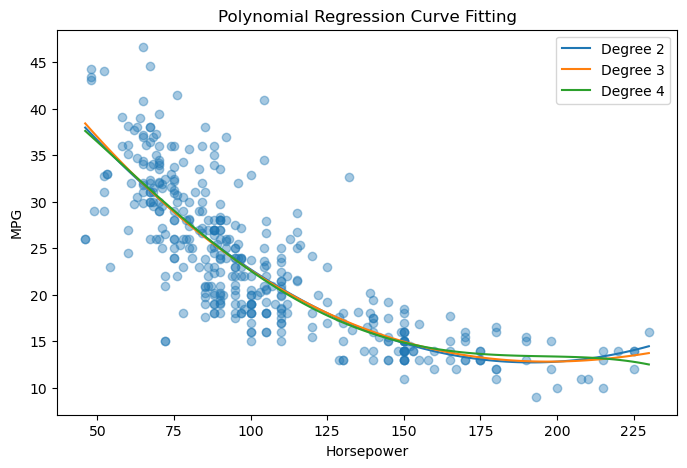

In [92]:

X_plot = np.linspace(X.min(), X.max(), 100)
X_plot_scaled = scaler.transform(X_plot)

plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.4)

for degree in [2, 3, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly_plot = poly.fit_transform(X_plot_scaled)
    
    model = LinearRegression()
    model.fit(poly.fit_transform(X_scaled), y)
    
    y_plot = model.predict(X_poly_plot)
    plt.plot(X_plot, y_plot, label=f"Degree {degree}")

plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial Regression Curve Fitting")
plt.legend()
plt.show()

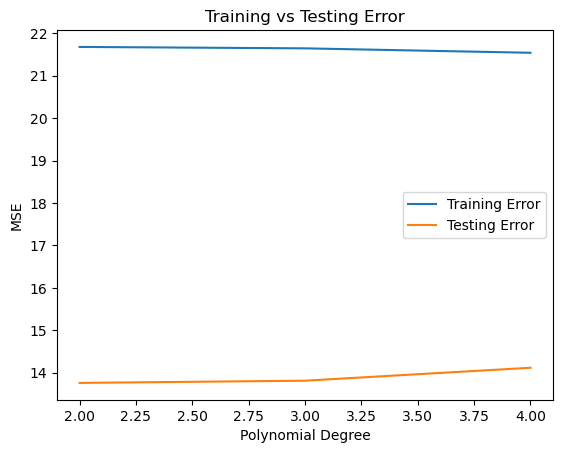

In [93]:

train_errors = []
test_errors = []

for degree in [2, 3, 4]:
    y_train_pred, y_test_pred = results[degree]
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.plot([2,3,4], train_errors, label="Training Error")
plt.plot([2,3,4], test_errors, label="Testing Error")
plt.xlabel("Polynomial Degree")
plt.ylabel("MSE")
plt.title("Training vs Testing Error")
plt.legend()
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


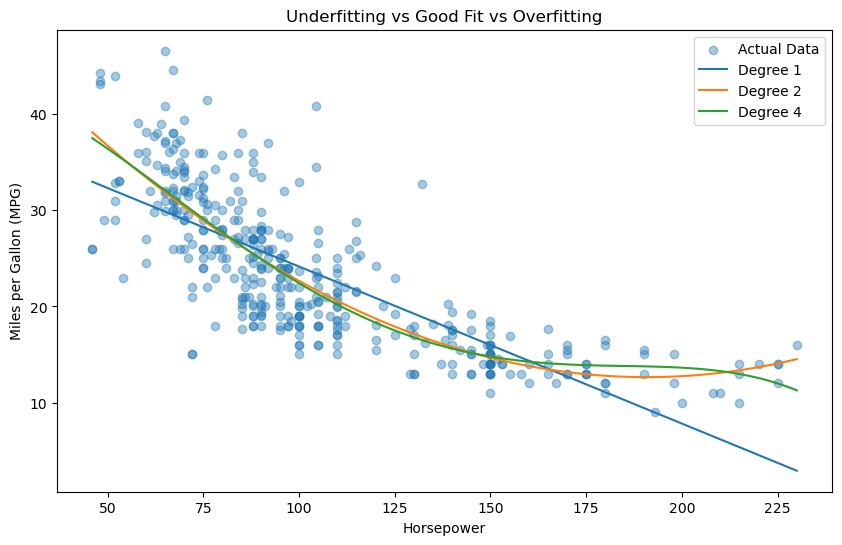

In [94]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_scaled = scaler.transform(X_plot)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.4, label="Actual Data")

for degree in [1, 2, 4]:
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X_plot_scaled)

    model = LinearRegression()
    model.fit(poly.fit_transform(X_train), y_train)

    y_plot_pred = model.predict(X_poly)
    plt.plot(X_plot, y_plot_pred, label=f"Degree {degree}")

plt.xlabel("Horsepower")
plt.ylabel("Miles per Gallon (MPG)")
plt.title("Underfitting vs Good Fit vs Overfitting")
plt.legend()
plt.show()